# Описание проекта

Сетевой супермаркет внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы и контролировать добросовестность кассиров при продаже алкоголя. Строится модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

**Импортирование всех необходимых библиотек**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [6]:
data = pd.read_csv('/datasets/games.csv')
# открытие и сохранение таблицы в переменную

**Выведу сводную информацию таблицы и первые 10 строк для ознакомления с ней**

In [9]:
def data_describe(data):
       display(data.head(10))
       display(data.describe())
       data.info()

In [10]:
data_describe(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<br> **Мне дана талица из 16715 строк, 11 столбцов - 6 из которых столбцы типа `float64` и 5 имеют тип данных `object`**
<br>**Столбец с годом выпуска - типа `float64`, можно перевести в целочисленный тип данных int, так как у нас указан только `Год выпуска`, половинчатым год никто не указывает, так что мне подойдет**
<br>**Так же стоит сделаеть столбцы `сritic_Score` и `user_score` одного типа, что бы оценки были "равнозначными"**

## **Предобработка данных**

### Название столбцов 

**Названия всех столбцов с заглавной буквы, что не очень соответствует правилам `красивого тона`**

In [11]:
data.columns = [x.lower() for x in data.columns]# так будет лучше😊

**И так я вижу что в 4 столбцах есть пропуски, и в процентном соотношении относительно всей информации только в 3 значимое количество пропусков, над которыми стоит задуматься**

In [12]:
data.head(20) #выведу 20 строк таблицы для ознакомления

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Перевод данных в нижний регистр

In [13]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
#привел в нижний регистр все данные в столбцах, содержащих текстовую информацию,
#что бы в дальнейшем не упустить дубликаты с разным написанием

**Столбец с рейтингом оставлю как есть**

**Сразу проверю пропуски в талице**

In [14]:
data.isna().sum()#сразу посмотрю пропуски в столбцах

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [15]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')# а так же проверю колличество пропусков в %

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


**И так я вижу что в 4 столбцах есть пропуски, и в процентном соотношении относительно всей информации только в 3 значимое количество пропусков, над которыми стоит задуматься**

### Удаление пропусков

In [16]:
data = data.dropna(subset=['name', 'year_of_release']).reset_index(drop=True)
# смело удалю две строки где пропущено название игры
# 2% от общего числа строк - удаление такой информации не должно повредить исследованию

**Все остальные пропуски удалять не стану, так как там информации от 40% от общего кол-ва данных**

#### Пропуски в столбце rating

**Согласно описанию к данным в столбце `rating` информация от компании Entertainment Software Rating Board. В википедии есть таблица этой компании о класификации рейтингов, воспользуемся данной информацией**https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board#Ratings


In [17]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Так же я в первоначальной информации не нашел рейтинга `K-A`, но есть данные что данный рейтинг использовали до 1998 года, а после заменили на `Е`
<br> Заменю этот рейтинг, что бы в дальнейшем было удонее группировать, если понадобится

In [18]:
data.loc[data['rating'] == 'K-A', 'rating'] = "E"

In [19]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

**В компании существует классификация рейтинга `RP` - "Рейтинг ожидается"(Игру отправили для оценки), для удобства использования данных пропуски в данном столбце можно было заменить на этот рейтинг, но так как нам не известно откуда взялись пропуски заменю их на "свой термин" - `NT`, предположив что ESRB не отправляли игру для оценки.**

In [20]:
data['rating'] = data['rating'].fillna('NT')

**Приведу столбцы с оценками критиков и юзеров к типу флоат оставлю пропуски, что бы не искажать исследование**
так как отсутствие информации подразумевает то, что игра не имеет оценки**




#### Пропуски в столбце critic_score

In [21]:
data['critic_score'] = pd.to_numeric(data['critic_score'], errors = 'coerce')# этот столбец уже нужного типа данных

#### Пропуски в столбце user_score

**Согласно описанию к проекту в столбце `user_score` встречается  абревеатура `tbd`, погуглив я нашел что данный термин означает:
`TBD` - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено)**

**Остальные пропуски заменю с такой же логикой как и в столбце `critic_score` и сразу приведу в нужный тип данных**

In [22]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

**Вывод**

**Могу предположить что пропуски в столбцах с рейтингами и оценками: это может быть из-за того, что не ко всем играм производители просили выпустить оценку критиков, а пользователи не всегда выставляют оценку, показатель рейтинга - тоже говорит о том, что Entertainment Software Rating Board не охватывает весь рынок**

### Изменение типов данных

**Столбец с годом выпуска - типа `float64`, можно перевести в целочисленный тип данных int, так как у нас указан только `Год выпуска`, половинчатым год никто не указывает, так что мне подойдет**

In [23]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Посчитайте суммарные продажи во всех регионах и запись их в отдельный столбец.

In [25]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NT
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NT


In [26]:
data['total_sales'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [27]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NT,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NT,31.38


## Исследовательский анализ данных

### Группировка игр по разным критериям

#### Группировка по годам

In [28]:
games_of_year = data.pivot_table(index='year_of_release', values='name', aggfunc = 'count')
# групировка по годам(по заданию)

In [29]:
games_of_year.head()
# менял значения до 50, но потом оставил первые 5 строк, что бы тетрадка не была слишком длинная

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


 **При выводе таблицы по годам заметил непонятное количество выпусков игр с годом выпуска = `0`, проверю данные**

In [30]:
data['year_of_release'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

In [31]:
data[data['year_of_release']==0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


**2376 Строк с пустыми данными, есть повод обратится к отделу предоставлявшему данные, а в моем случаи придется удалить, что бы эти строчки не влияли на дальнейшее исследование**

In [32]:
data = data[data['year_of_release'] != 0]

In [33]:
games_of_year = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
# групировка по годам

In [34]:
games_of_year.head(5)
# менял значения до 37, но потом оставил первые 5 строк, что бы тетрадка не была слишком длинная

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


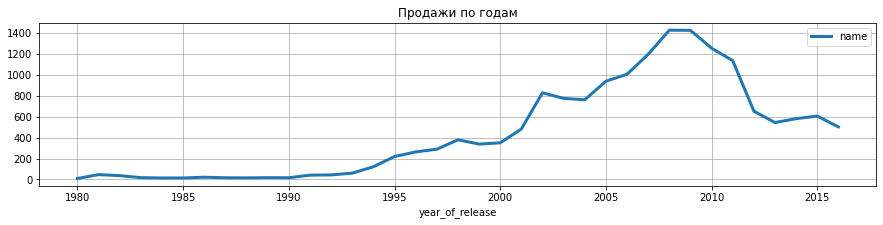

In [35]:
games_of_year.plot(grid=True, 
       figsize = (15, 3),
       title = 'Продажи по годам',           
        
       linewidth = 3)

plt.show()

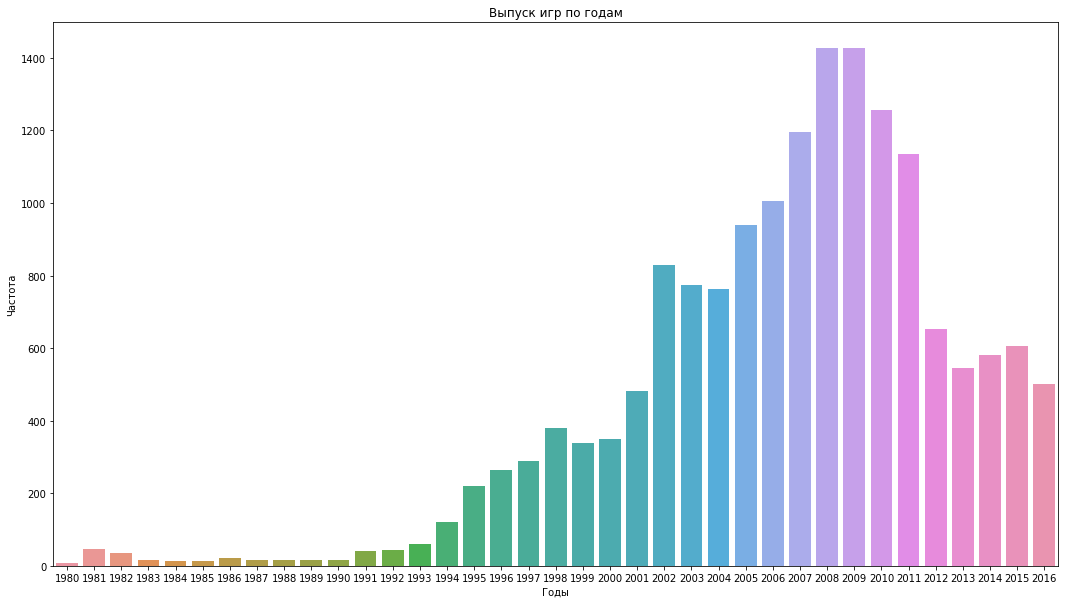

In [36]:
#КОД РЕВЬЮЕРА
games_of_year = games_of_year.reset_index()

plt.figure(figsize=(18,10))
sns.barplot(data=games_of_year, x='year_of_release', y='name')
plt.title("Выпуск игр по годам")
plt.xlabel("Годы")
plt.ylabel("Частота");

In [37]:
games_of_year.describe()

,year_of_release,name
count,37.000000,37.000000
mean,1998.000000,444.432432
std,10.824355,451.604334
min,1980.000000,9.000000
25%,1989.000000,36.000000
50%,1998.000000,338.000000
75%,2007.000000,762.000000
max,2016.000000,1427.000000


- **За 37 лет продаж в основном продажи игр начали активно выпускаться только во второй половине этого периода(а именно с 98-99 годах), показатель после этих лет более 300 игр в год**
- **До 94 года выпускали не больше 60 игр в год**
- **Максимальное количество игр выпущеных за год было в 2008 году, а после почему то пошел спад в выпусках новых игр**
- **Поэтому считаю что актуально использовать данные для исследования только с 1998 года(вторую половину данных), когда выпуск игр в год составлял более 300штук**

#### Группировка по платформам

In [38]:
game_of_platform_sales = data.pivot_table(index = 'platform', values = 'name', aggfunc = 'count').sort_values(by='name')

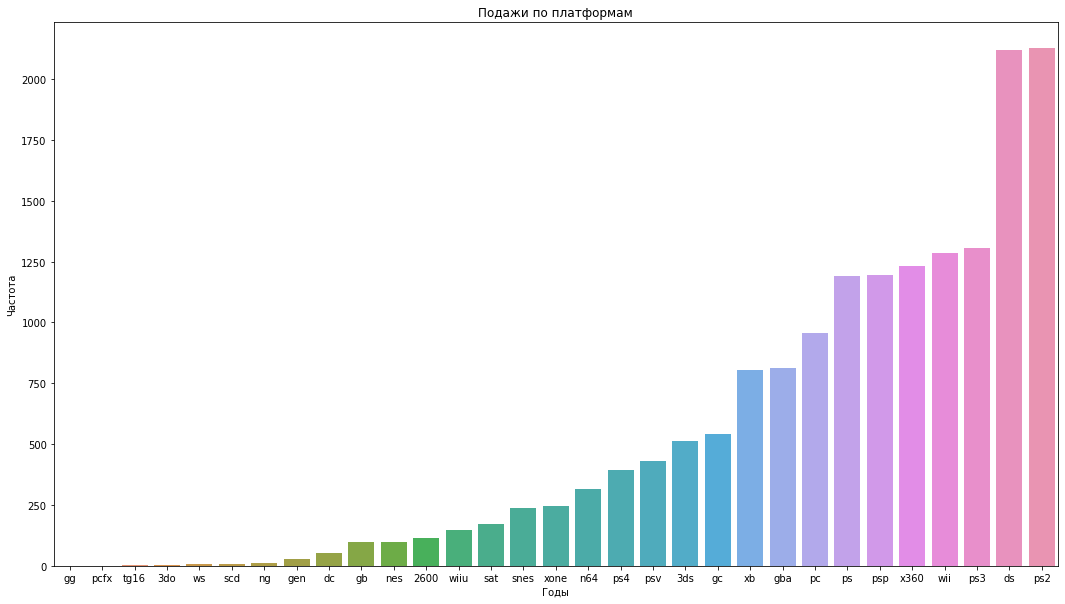

In [39]:
game_of_platform_sales = game_of_platform_sales.reset_index()

plt.figure(figsize=(18,10))
sns.barplot(data=game_of_platform_sales, x='platform', y='name')
plt.title('Подажи по платформам')
plt.xlabel("Годы")
plt.ylabel("Частота");


plt.show()

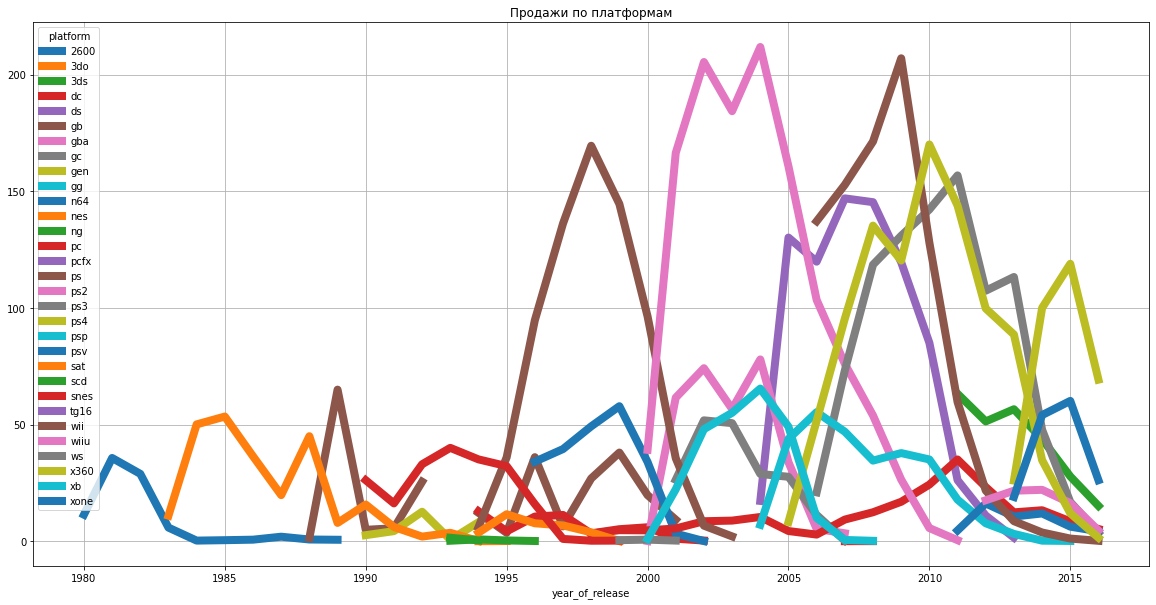

In [40]:
(data.query('1980 <= year_of_release <= 2016')
 .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
 .plot(grid=True, 
       title = 'Продажи по платформам',
       figsize = (20, 10), 
       linewidth = 8)
)
plt.show()


Для начала я взял весь временной период исследования, что бы нагляднее видно, появление, пики продаж и "уход в закат" приставок

- Сгрупировав игры по годам и платформам я увидел что до 1983 года были выпуски только на платформу 2600(не слышал о ней раньше, теперь знаю, о существовании Atari-2600)
- В 1983 году выпустили приставку NES - или "Денди"(которая была широко распростаненна в России)
- Первая игра на ПК вышла только в 1985, а следующая спустя 3 года в 1988 году.
- В основном массовые выпуски игр начались в среднем после 2000 года
- На некоторые платформы вообще перестали выпускать игры к 2000 году(такие как 2600(Атари), 3do, 3ds, ds  и другие


#### Прогноз продаж на 2017 год

In [68]:
data_current = data.query("2014 <= year_of_release <= 2016")

# создал отдельный датасет со строчками актуального периода 
#для дальнейшего исследования

In [69]:
data_current.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


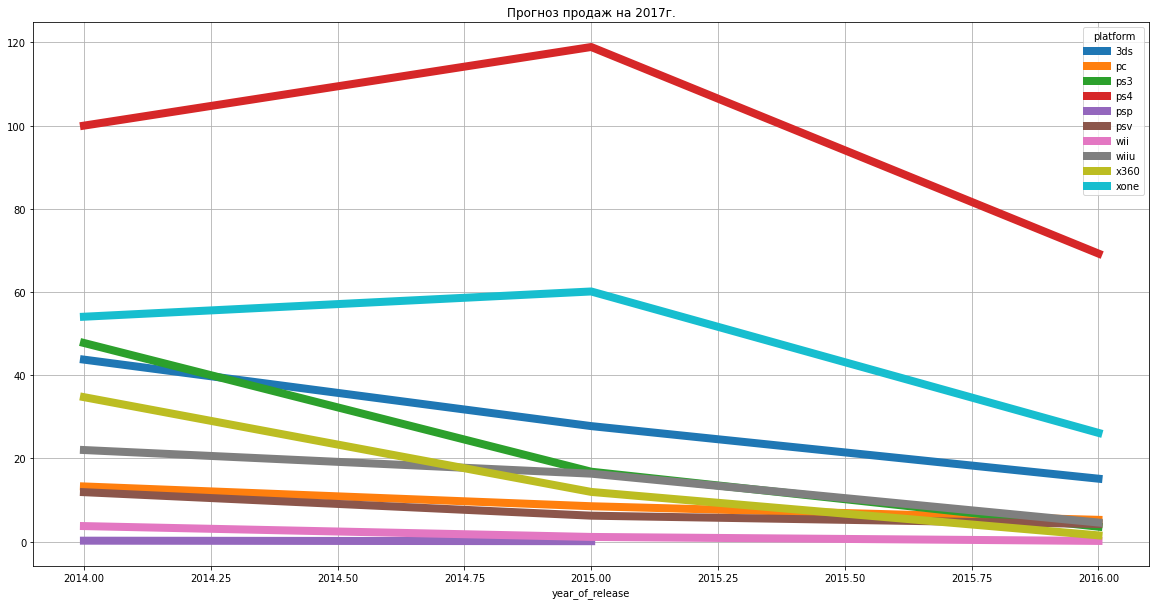

In [70]:
(data_current.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
  .plot(grid = True, 
        title = 'Прогноз продаж на 2017г.',
        figsize = (20, 10), 
        linewidth = 8)
)
plt.show()

**К концу 2016 года продажи по всем платформам стремятся к `нулю`(падают), только ps4,xone и 3ds показывают актуальность**

#### Лидеры продаж

In [71]:
top_7 = data_current.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).head(7)

In [72]:
top_7

platform
ps4     288.15
xone    140.36
3ds      86.68
ps3      68.18
x360     48.22
wiiu     42.98
pc       27.05
Name: total_sales, dtype: float64

**Топ 7 самых продаваемые платформы**

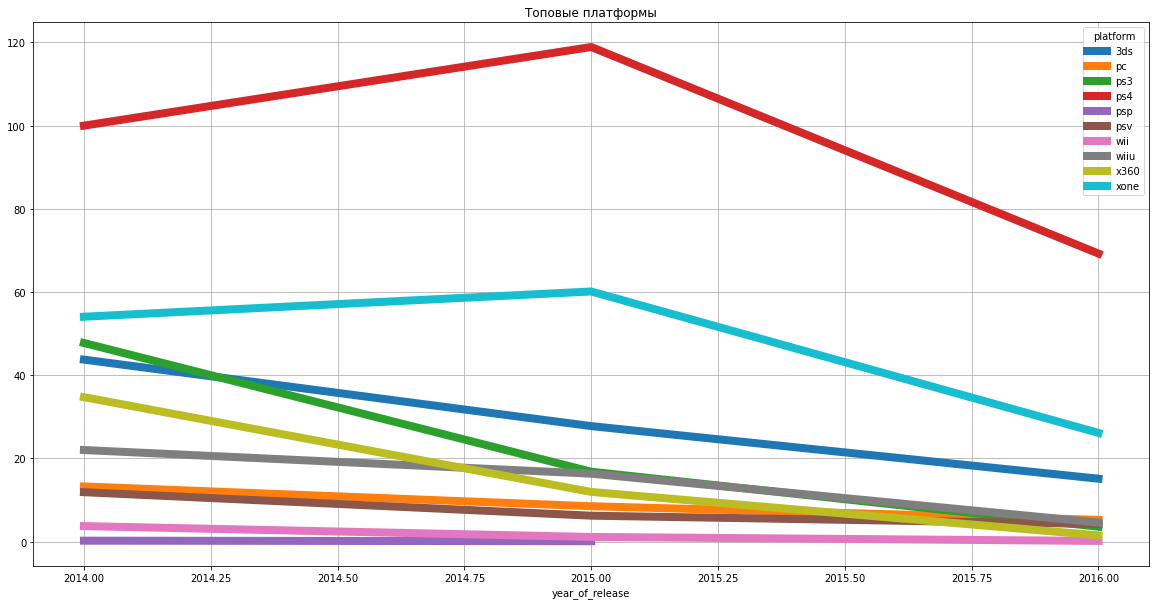

In [73]:
(data_current
 .pivot_table(index ='year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
 .plot(grid=True, 
       title = 'Топовые платформы',
       figsize = (20, 10), 
       linewidth = 8,
       )
)
plt.show()


**Теперь видно что самые популярные платформы `ps4` и `xone`, остальные же платформы за последние 2 года максимально приблизили свои продажи к Нулю, `3ds` платформа вообще с 2015 лишилась продаж**

#### Ящик с усами

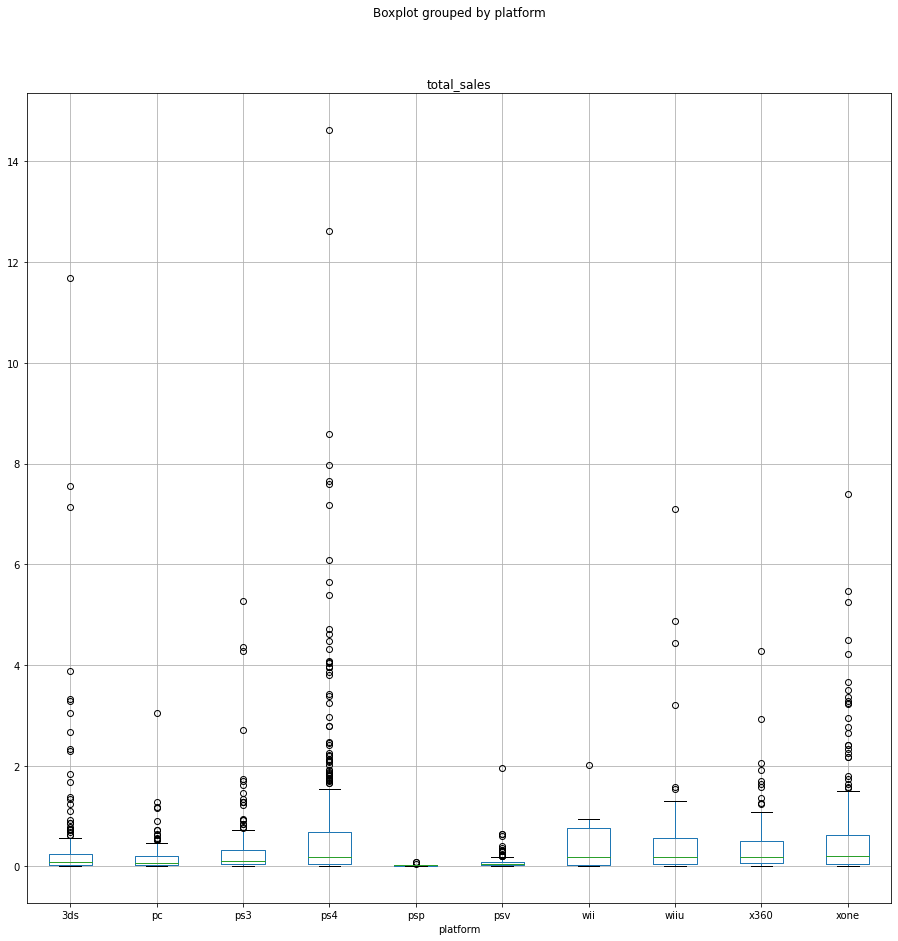

In [74]:
data_current.boxplot(column = 'total_sales', 
             by = 'platform', 
                     
             figsize = (15,15),
             
            )
#plt.ylim(0, 5) #теперь выравнивание не нужно
plt.show()

На диаграмах размаха у всех платформ видны большие количества выбросов и редкие явления. Это может быть связано с тем, что на каждой платформе в свой промежуток времени были игры которые "выстрелили"

#### Влияние оценок

**Для анализа возьму платформу `ps4`, так как она показала сакмые высокие продажи**

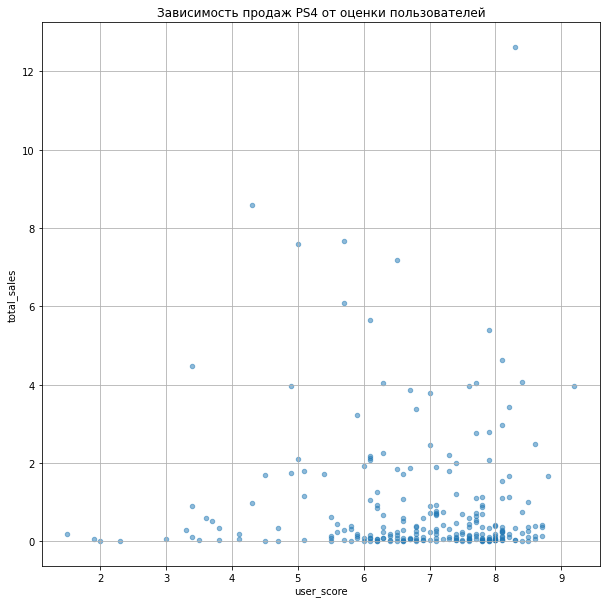

In [75]:
data_current[data_current['platform']=='ps4'].plot(x = 'user_score', 
                                   title = 'Зависимость продаж PS4 от оценки пользователей',                
                                   y = 'total_sales', 
                                   kind = 'scatter', 
                                   alpha = 0.5, 
                                   figsize = (10,10), 
                                   grid=True)
plt.show()

In [76]:
data_current[data_current['platform']=='ps4'].pivot_table(index='name', values=['user_score', 'total_sales']).corr()

,total_sales,user_score
total_sales,1.000000,-0.040132
user_score,-0.040132,1.000000


Корреляция отрицательная и слабая

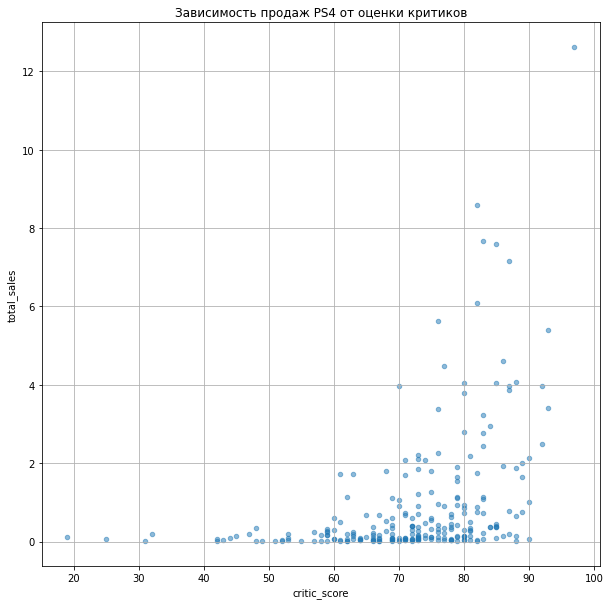

In [77]:
data_current[data_current['platform']=='ps4'].plot(x = 'critic_score', 
                                   title = 'Зависимость продаж PS4 от оценки критиков',
                                   y = 'total_sales', 
                                   kind = 'scatter', 
                                   alpha = 0.5, 
                                   figsize = (10,10), 
                                   grid=True)
plt.show()

In [78]:
data_current[data_current['platform']=='ps4'].pivot_table(index='name', values=['critic_score', 'total_sales']).corr()

,critic_score,total_sales
critic_score,1.000000,0.402661
total_sales,0.402661,1.000000


In [79]:
x = ['ps3','wii','pc','psp']

In [80]:
print('Корреляция платформы ps3')
display(data_current[data_current['platform']=='ps3'].pivot_table(index='name', values=['critic_score', 'total_sales']).corr())
display(data_current[data_current['platform']=='ps3'].pivot_table(index='name', values=['user_score', 'total_sales']).corr())
print('Корреляция платформы xone')
display(data_current[data_current['platform']=='xone'].pivot_table(index='name', values=['critic_score', 'total_sales']).corr())
display(data_current[data_current['platform']=='xone'].pivot_table(index='name', values=['user_score', 'total_sales']).corr())

Корреляция платформы ps3


,critic_score,total_sales
critic_score,1.000000,0.446575
total_sales,0.446575,1.000000


,total_sales,user_score
total_sales,1.000000,-0.166761
user_score,-0.166761,1.000000


Корреляция платформы xone


,critic_score,total_sales
critic_score,1.000000,0.428677
total_sales,0.428677,1.000000


,total_sales,user_score
total_sales,1.000000,-0.070384
user_score,-0.070384,1.000000


Корреляция положительная, но тоже слабая

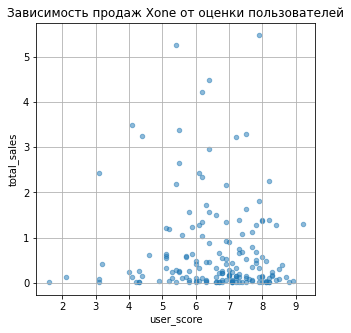

In [81]:
data_current[data_current['platform']=='xone'].plot(x = 'user_score',
                                   title = 'Зависимость продаж Xone от оценки пользователей', 
                                   y = 'total_sales', 
                                   kind = 'scatter', 
                                   alpha = 0.5, 
                                   figsize = (5,5), 
                                   grid=True)
plt.show()

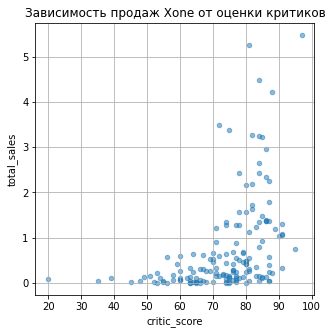

In [82]:
data_current[data_current['platform']=='xone'].plot(x = 'critic_score',
                                   title = 'Зависимость продаж Xone от оценки критиков', 
                                   y = 'total_sales', 
                                   kind = 'scatter', 
                                   alpha = 0.5, 
                                   figsize = (5,5), 
                                   grid=True)
plt.show()

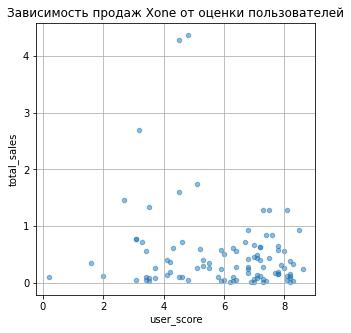

In [83]:
data_current[data_current['platform']=='ps3'].plot(x = 'user_score',
                                   title = 'Зависимость продаж Xone от оценки пользователей', 
                                   y = 'total_sales', 
                                   kind = 'scatter', 
                                   alpha = 0.5, 
                                   figsize = (5,5), 
                                   grid=True)
plt.show()

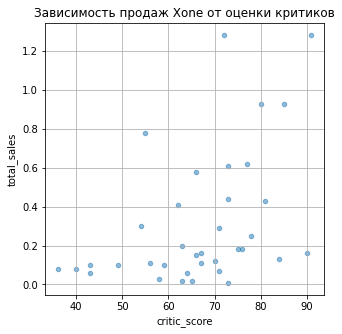

In [84]:
data_current[data_current['platform']=='ps3'].plot(x = 'critic_score',
                                   title = 'Зависимость продаж Xone от оценки критиков', 
                                   y = 'total_sales', 
                                   kind = 'scatter', 
                                   alpha = 0.5, 
                                   figsize = (5,5), 
                                   grid=True)
plt.show()

**Корреляции продаж от оценок пользователей не имеет значения, тогда как оценки критиков влияют на продажи, однако не очень сильно, Такое же явление и у других приставок**

**Оценки критиков или пользователей слабо но влияют на увеличение продаж, у самых популярнх платформ стандартное отклонение очень высокое, получается основные продажи на платформе могли быть из-за каких то нововедениях, или же за счет популярности того или иного жанра/серии игры. У всех остальных платформ в основном этот показатель не высокий**

#### Продажи по жанрам

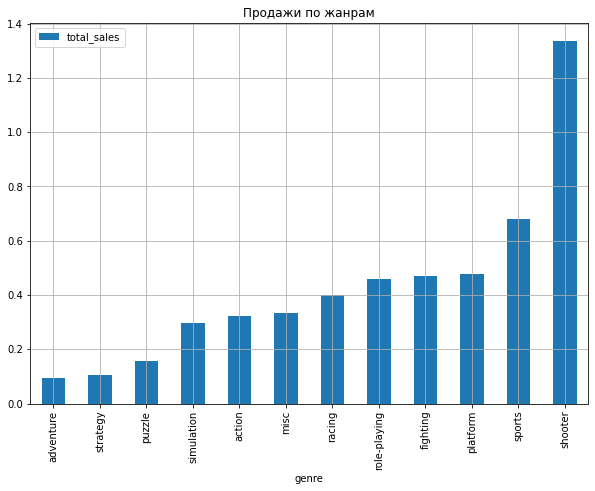

In [85]:
(data_current.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean').sort_values('total_sales')
 .plot(kind = 'bar',
       grid=True, 
       title = 'Продажи по жанрам',
       figsize = (10, 7), 
       linewidth = 8)
)
plt.show()

In [59]:
##КОД РЕВЬЮЕРА
data_current.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['count', 'sum', 'mean'])

,count,sum,mean
,total_sales,total_sales,total_sales
genre,,,
action,227,126.39,0.556784
adventure,34,5.74,0.168824
fighting,31,12.37,0.399032
misc,32,12.04,0.376250
platform,26,15.00,0.576923
puzzle,4,1.28,0.320000
racing,45,22.00,0.488889
role-playing,97,49.14,0.506598


In [60]:
(data_current
 .pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean')
 .sort_values(by = 'total_sales', ascending=False)
)

,total_sales
genre,
shooter,1.276897
sports,0.943012
platform,0.576923
action,0.556784
role-playing,0.506598
racing,0.488889
simulation,0.486500
fighting,0.399032
misc,0.376250


**Самые продаваемые игры это Экшины, потом спорт и шутеры и уже в конце ролевые игры**
<br> **Стратегии, приключения и пазды - самые малопродаваемые жанры**

## Портрет пользователя

### 5 популярных платформ

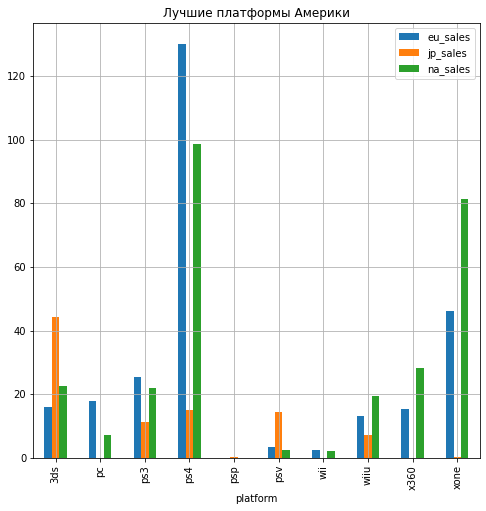

In [87]:
(data_current
 .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
 .reset_index()
 .plot(kind = 'bar',
       x = 'platform',
       grid=True, 
       title = 'Лучшие платформы Америки',
       figsize = (8, 8), 
       linewidth = 8)
)
plt.show()          

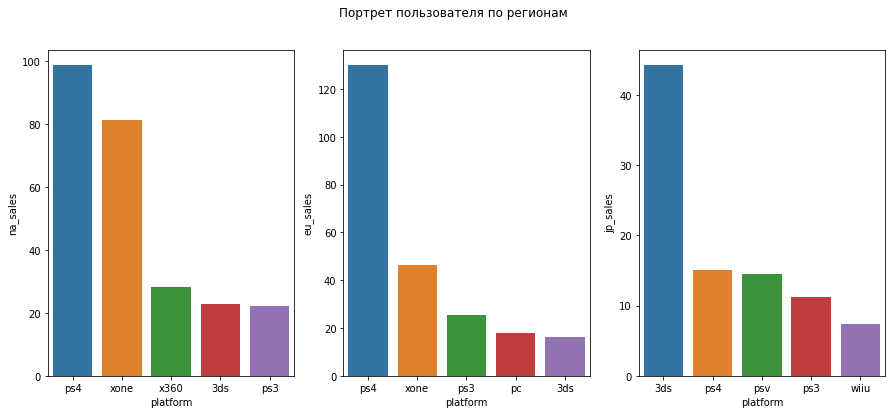

In [88]:
##КОД РЕВЬЮЕРА
data_current1 = data_current.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
eu_sales = data_current1.sort_values(by="na_sales", ascending=False).head(5)
jp_sales = data_current1.sort_values(by="eu_sales", ascending=False).head(5)
na_sales = data_current1.sort_values(by="jp_sales", ascending=False).head(5)
    #применяем subplots  и строим три графика в одну линию
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,6))
fig.suptitle("Портрет пользователя по регионам")
sns.barplot(x='platform', y='na_sales', data=eu_sales, ax=axes[0])
sns.barplot(x='platform', y='eu_sales', data=jp_sales, ax=axes[1])
sns.barplot(x='platform', y='jp_sales', data=na_sales, ax=axes[2])
plt.show()

#### Доля продаж топовых платформ на рынке

In [89]:
full_sales_na = data_current['na_sales'].sum()
full_sales_eu = data_current['eu_sales'].sum()
full_sales_jp = data_current['jp_sales'].sum()

In [64]:
top5_platform_na = (data_current.groupby(['platform'])['na_sales']
                    .sum()
                    .sort_values(ascending=False)
                    .head(5))
top5_platform_eu = (data_current.groupby(['platform'])['eu_sales']
                    .sum()
                    .sort_values(ascending=False)
                    .head(5))
top5_platform_jp = (data_current.groupby(['platform'])['jp_sales']
                    .sum()
                    .sort_values(ascending=False)
                    .head(5))

In [65]:
print('Доля продаж в Америке:', top5_platform_na / full_sales_na * 100)
print('\n')
print('Доля продаж в Европе:', top5_platform_eu / full_sales_eu * 100)
print('\n')
print('Доля продаж в Японии:', top5_platform_jp / full_sales_jp * 100)

Доля продаж в Америке: platform
ps4     40.980822
xone    36.553425
wiiu     8.186301
3ds      4.273973
pc       3.775342
Name: na_sales, dtype: float64


Доля продаж в Европе: platform
ps4     56.629727
xone    21.178371
pc       8.486941
wiiu     5.925266
3ds      2.923651
Name: eu_sales, dtype: float64


Доля продаж в Японии: platform
3ds     32.751236
ps4     27.973641
wiiu    19.044481
psv     13.377265
ps3      5.831960
Name: jp_sales, dtype: float64


**Вывод:** В Америке и европе самая популярная приставка PS4 - её доля на рынке за 2014-2016 года в Америке - 34%, в Европе 48%, в Японии самая популярная приставка 3DS(карманная консоль) - с долей на рынке в 47%

### 5 популярных жанров

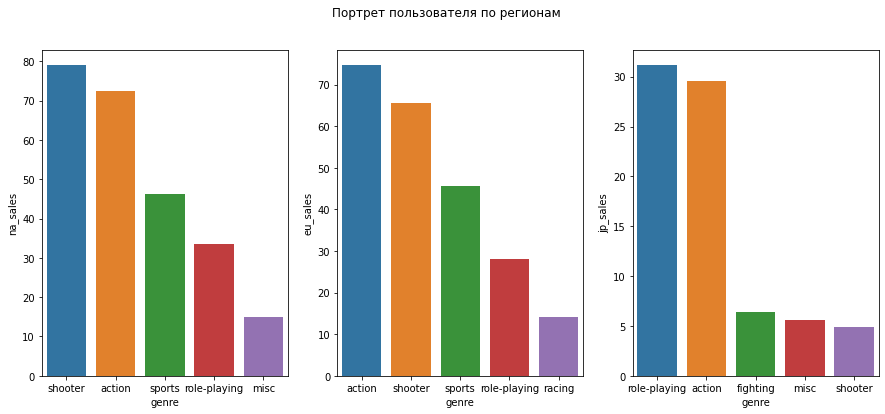

In [86]:
data_current2 = data_current.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
eu_sales = data_current2.sort_values(by="na_sales", ascending=False).head(5)
jp_sales = data_current2.sort_values(by="eu_sales", ascending=False).head(5)
na_sales = data_current2.sort_values(by="jp_sales", ascending=False).head(5)
    #применяем subplots  и строим три графика в одну линию
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,6))
fig.suptitle("Портрет пользователя по регионам")
sns.barplot(x='genre', y='na_sales', data=eu_sales, ax=axes[0])
sns.barplot(x='genre', y='eu_sales', data=jp_sales, ax=axes[1])
sns.barplot(x='genre', y='jp_sales', data=na_sales, ax=axes[2])
plt.show()

**Вывод:** По жанрам в Америке больше всего любят шутеры, а после ниж экшены. В европе же эти два жанра тоже лидеры, но экшены продаются больше.
<br> В Японии ролевые игры - самые популярные, но и экшены хорошо продаются.
<br> Что бы завоевать сердца большинства стоит выпускать больше ЭКШЕНОВ.

### Влияние рейтинга ESRB на продажи

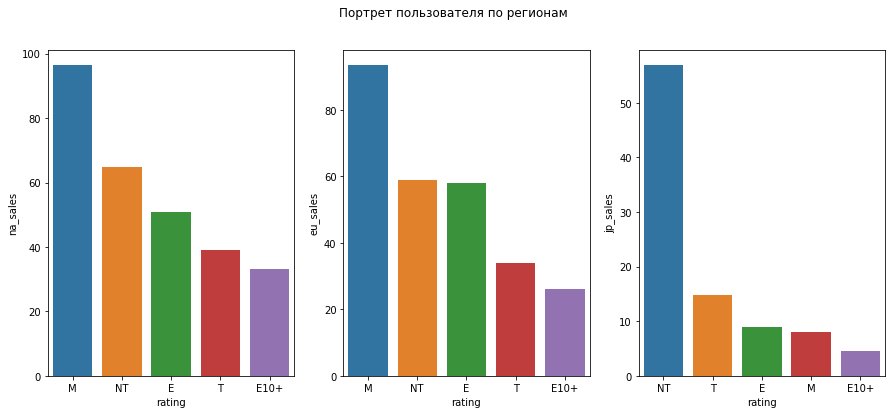

In [96]:
data_current3 = data_current.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
eu_sales = data_current3.sort_values(by="na_sales", ascending=False).head(5)
jp_sales = data_current3.sort_values(by="eu_sales", ascending=False).head(5)
na_sales = data_current3.sort_values(by="jp_sales", ascending=False).head(5)
    #применяем subplots  и строим три графика в одну линию
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,6))
fig.suptitle("Портрет пользователя по регионам")
sns.barplot(x='rating', y='na_sales', data=eu_sales, ax=axes[0])
sns.barplot(x='rating', y='eu_sales', data=jp_sales, ax=axes[1])
sns.barplot(x='rating', y='jp_sales', data=na_sales, ax=axes[2])
plt.show()

**Вывод:**

В Америке и Европе больше всего игр в продаже с рейтингом «M» («Mature») — «От 17 лет». 
В Японии больше всего игр в продаже без рейтинга ESRB, дело в том, что рейтинг ESRB предназначен только для США и Канады, для других регионов он не применяется.  А в Японии есть свой рейтинг, но по нему у нас нет данных.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [98]:
data_current = data_current.dropna()#удаление пропусков для проверки гипотез

Нулевая гипотеза и альтернативная гипотеза:
<br>H0: средние рейтинги по платформам одинаковые
<br>H1: средние рейтинги по платформам разные

За нулевую гипотезу взял само задание, так как мы его и проверяем, а за альтернативную гипотезу взял противоположный вывод

In [99]:
xone = data_current[data_current['platform'] == 'xone']['user_score']
pc = data_current[data_current['platform'] == 'pc']['user_score']
alpha = .05 #если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
xone,
pc)

In [100]:
print('p-значение:', results.pvalue)

p-значение: 0.12817793652639856


In [101]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


**Вывод:**
<br> Следовательно по большей части оценки пользователей у платформ PC и Xone одинаковые

### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза и альтернативная гипотеза:
<br>H0: средние рейтинги по жанрам одинаковые
<br>H1: средние рейтинги по платформам разные


**За нулевую гипотезу взял обратную заданию, что бы проверял схожесть показателей, за альтернативную взял гипотезу неравенства**

In [102]:
action = data_current[data_current['genre'] == 'action']['user_score']
sports = data_current[data_current['genre'] == 'sports']['user_score']
alpha = .05 #если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
action,
sports)

In [103]:
print('p-значение:', results.pvalue)

p-значение: 4.0540895999943536e-10


In [104]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


**Вывод:**
<br> Следовательно оценки пользователей у ;жанров Action и Sports отличаются

**Для проверки гопитез я использовал t-критерий Стьюдента, так как он подходит для проверки гипотез о параметрах распределений, связанных выборок**

**Вывод:**
<br> При сравнении оценки пользователей между платформами `PC` и `Xone` наш тест показал, что гипотезу не получилось отвергнуть, следовательно Оценки пользователей в данном случаи будут скорей всего одинаковые.
<br> При проверки гипотезы об оценки по Жанрам не подтвердилась гипотеза о сходстве оценок, стало быть среди жанров `Actionu` и `Sport` оценки пользователей всегда разные

## Вывод:

Проанализировав данные я выяснил что самая ТОПовая приставка среди рынков Америки, Европы и Японии - это PS4, 

<br>Доля продаж в Америке: 
<br>ps4     34.714497
<br>xone    28.610153 
<br>
<br>Доля продаж в Европе:
<br>ps4     48.041968
<br>xone    17.086597
<br>
<br>Доля продаж в Японии: 
<br>3ds     47.523902
<br>ps4     16.134923
<br>
<br>Как видно из цифр Анализа в Америке за 2014-2016 год доля продаж на PS4 составила 1/3 рынка, в Европе почти 50%.
<br>с 2014 года продали `280 млн` игр на данную приставку, ближайший конкурент Xone имеет всего `148 млн` проданных игр за тот же период.
<br>Среди жанров игр можно выделить 4 вида. Больше всех лидируют **ШУТЕРЫ** - в среднем 1,3 млн проданных копий, жанр **Спорт игр** - 0,68 млн и Платформенные игры и Файтинги(в простонароде Драчки) - по 0,47 млн копий
<br>
<br>Корреляция оценки кририков к продажам PS4 0.402661, 
<br>Корреляция оценки пользователей к продажам PS4 -0.040132
<br> На других платформах подобные зависимости, это говорит о том, что к оценке критиков всётаки стоит присматриваться
<br>
<br>Самый популярный рейтинг ESRB - это рейтинг `M`, что в Европе, что в Америке
<br>
<br>И согласно моим гипотезам средний пользовательский рейтинг между платформами Xone и PC разный, как и рейтинг пользователей у жанров Спорт и Экшен.

